In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df= pd.read_csv('Breast_cancer_dataset.csv')

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

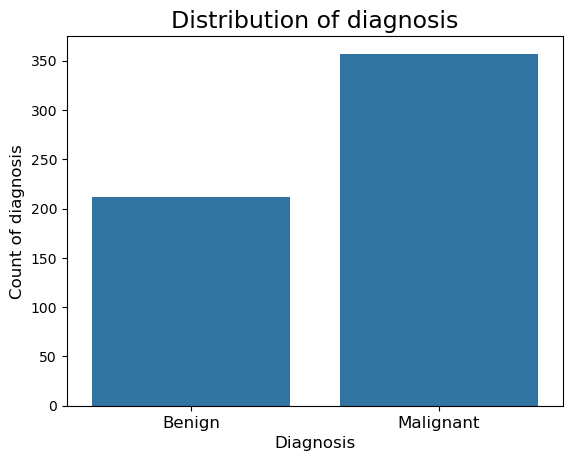

In [6]:
# Distribution of the target variable
sns.countplot(x="diagnosis",data=df)
plt.title("Distribution of diagnosis",fontsize=17,c="k")
plt.xlabel("Diagnosis",fontsize=12)
plt.ylabel("Count of diagnosis",fontsize=12)
plt.xticks([0, 1], ['Benign', 'Malignant'], fontsize=12)
plt.show()

In [7]:
# Remove unwanted columns from the dataset
df=df.drop(["Unnamed: 32", "id"],axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

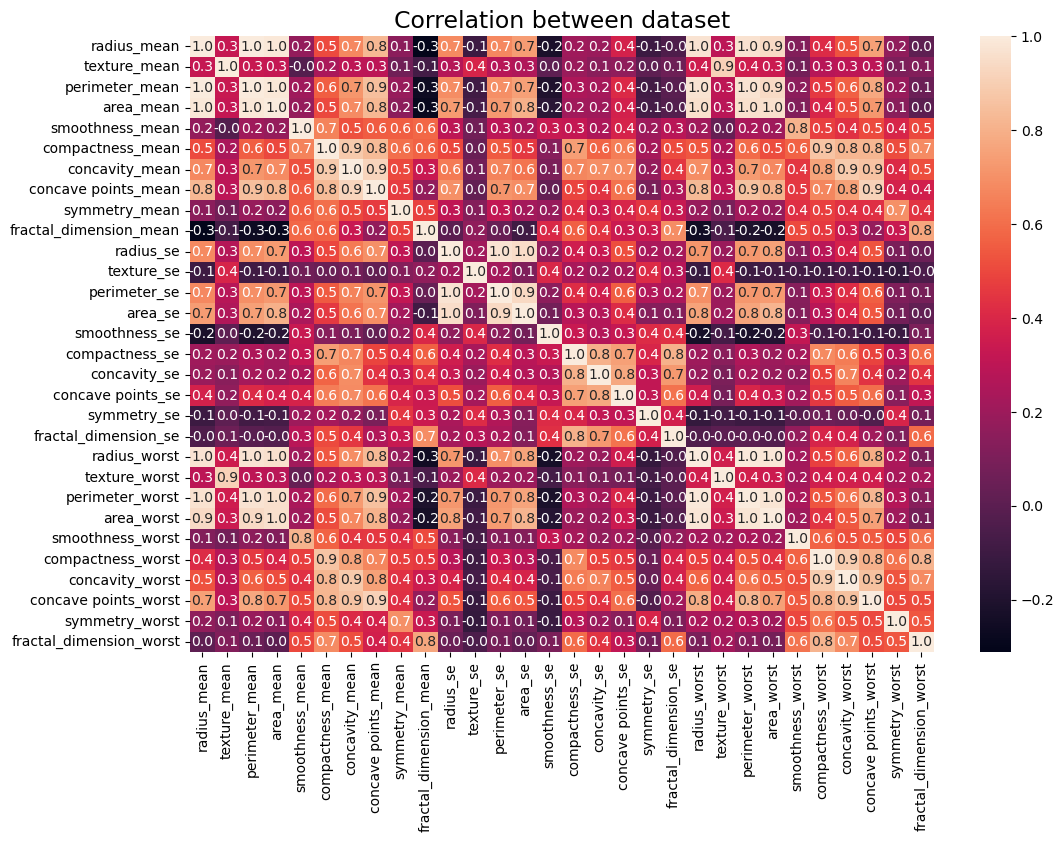

In [8]:
# Correlation heatmap
plt.figure(figsize=(12,8))
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()

In [9]:
# Transform diagnosis column into numeric
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["diagnosis"]=Encoder.fit_transform(df["diagnosis"])
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [10]:
## Split data into feature(x) and target(y)
x = df.drop("diagnosis",axis=1)
y = df["diagnosis"]
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42))
])
# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [20]:
y_pred_test_log_reg=pipeline.predict(x_test)
y_pred_train_log_reg=pipeline.predict(x_train)

In [21]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_log_reg
#    'Predicted Probability': y_pred_test_prob_log_reg
})
# Display the first 5 instances in the result dataframe
results_df.head()


Actual Label  Predicted Label
204             0                0
70              1                1
131             1                1
431             0                0
540             0                0

In [22]:
training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)
print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Logistic Regression
Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


Confusion Matrix:
[[70  1]
 [ 2 41]]


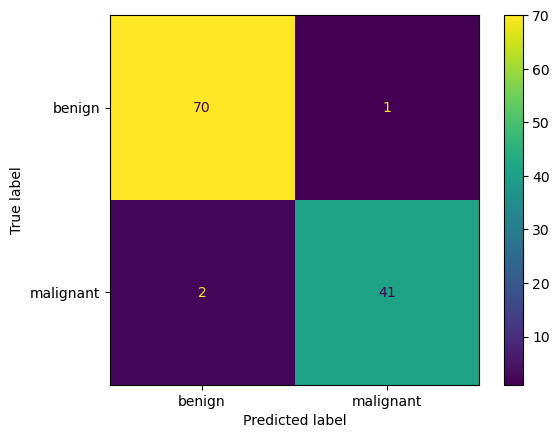

In [23]:
# Print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
print(conf_matrix)
# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()


In [24]:
# Print classification report
print("\t\tLogistic Regression Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_log_reg))


		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [27]:
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_log_reg)
# Compute the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)
# Compute Youden's J statistic for each threshold
roc_auc

0.9697019325253848

Optimal Threshold: 1.0000


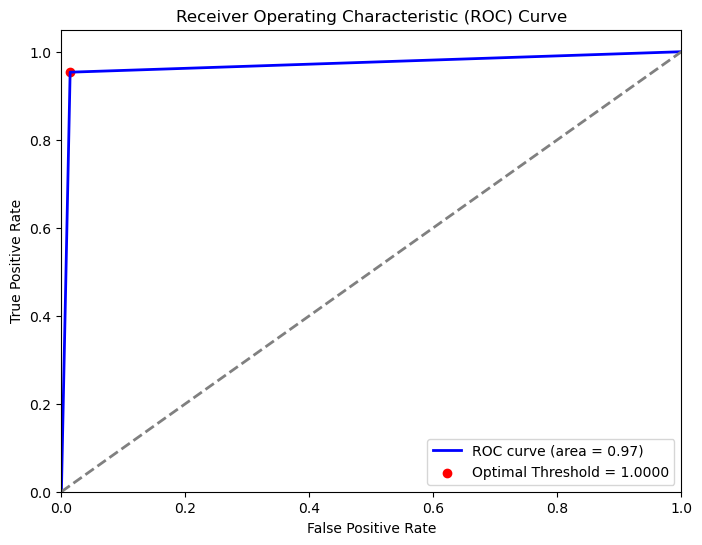

In [28]:
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold:.4f}")
# Plot the ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Naive Bayes Classifier

In [30]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('nb', GaussianNB())])

In [33]:
#Predict on the training and testing set
y_pred_train_nb = pipeline.predict(x_train)
y_pred_test_nb = pipeline.predict(x_test)
# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")
y_pred_prob_nb = pipeline.predict_proba(x_test)[:, 1]



Naïve Bayes:
Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9649122807017544


In [34]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_nb,
    'Predicted Probability': y_pred_prob_nb
})
results_df.head()

Actual Label  Predicted Label  Predicted Probability
204             0                0           1.349483e-09
70              1                1           1.000000e+00
131             1                1           1.000000e+00
431             0                0           9.801091e-12
540             0                0           8.102568e-15

Confusion Matrix:
[[70  1]
 [ 3 40]]


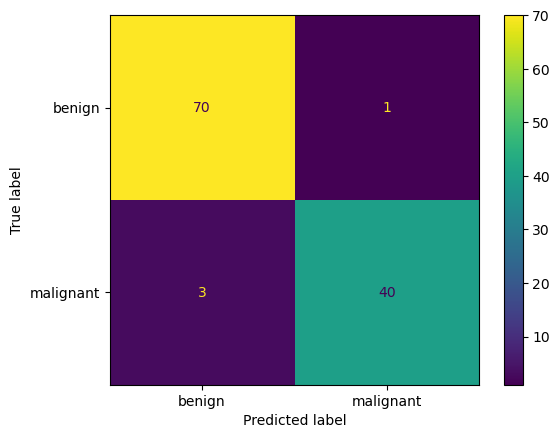

In [35]:
# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)
# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_nb, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

In [36]:
# Print classification report
print("\t\tLogistic Regression Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_nb))

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nb)
# Compute the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)
# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

Optimal Threshold: 0.0126


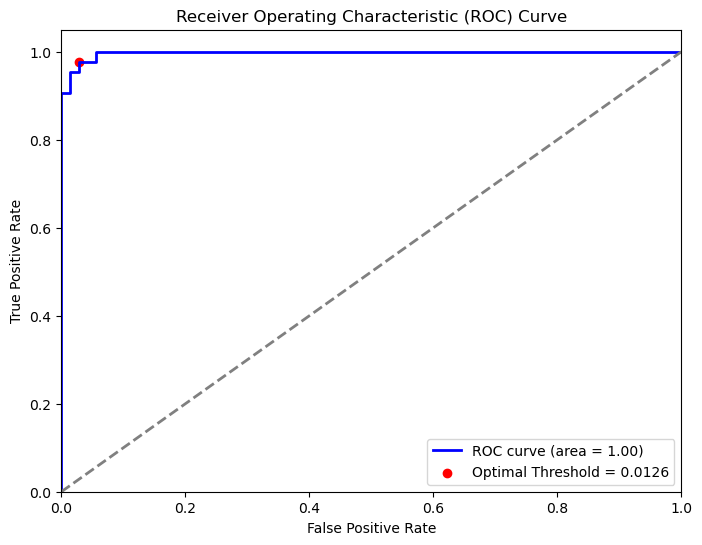

In [39]:
# Plot the ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#KNN

In [50]:
# Import Required Libraries and apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),   # Standardize the data
    ('knn', KNeighborsClassifier(n_neighbors=7)) # KNN classifier
])
pipeline_knn.fit(x_train, y_train)
# Predict on the training and testing set
y_pred_train_knn = pipeline_knn.predict(x_train)
y_pred_test_knn = pipeline_knn.predict(x_test)

In [51]:
# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("\nK-Nearest Neighbors (KNN)")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")
y_pred_prob_knn = pipeline_knn.predict_proba(x_test)[:, 1]


K-Nearest Neighbors (KNN)
Training Accuracy: 0.9692307692307692
Testing Accuracy: 0.9473684210526315


In [52]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_knn,
    'Predicted Probability': y_pred_prob_knn
})
results_df.head()

Actual Label  Predicted Label  Predicted Probability
204             0                0                    0.0
70              1                1                    1.0
131             1                1                    1.0
431             0                0                    0.0
540             0                0                    0.0

Confusion Matrix:
[[68  3]
 [ 3 40]]


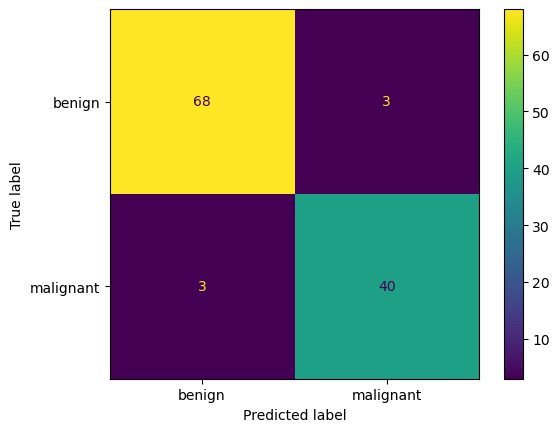

In [53]:
# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)
# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

In [54]:
    # Print classification report
print("\t\tK-Nearest Neighbors Classification Report:")
print("\t\t-----------------------------------")
print(classification_report(y_test, y_pred_test_knn))

		K-Nearest Neighbors Classification Report:
		-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Optimal Threshold: 0.3333


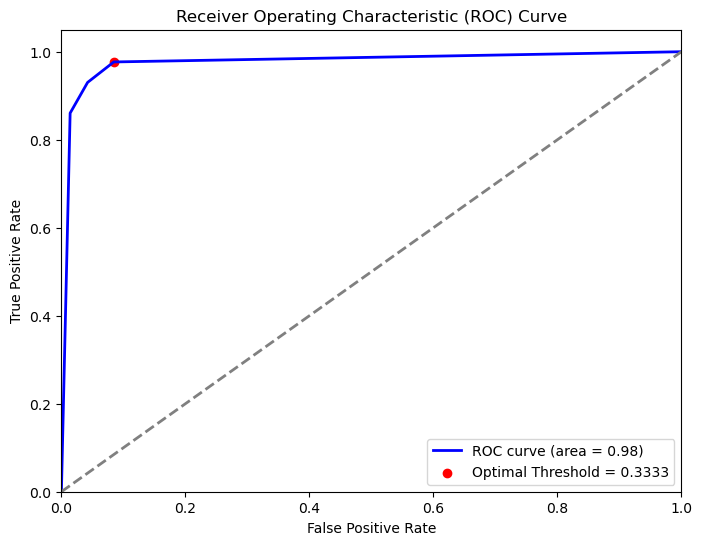

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)
# Find the optimal threshold by maximizing Youden's J statistic
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold:.4f}")
# Plot ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {'knn__n_neighbors': np.arange(1, 21)}  #__ used to define the parm
# Create a pipeline with a scaler and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Standardize the data
    ('knn', KNeighborsClassifier())  # KNN classifier
])
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)
# Get the best k value
optimal_k = grid_search.best_params_['knn__n_neighbors']
print(f"The optimal number of neighbors is {optimal_k}")
# Get the best score
best_score = grid_search.best_score_
print(f"The best cross-validated accuracy is {best_score}")

The optimal number of neighbors is 7
The best cross-validated accuracy is 0.9713526570048309


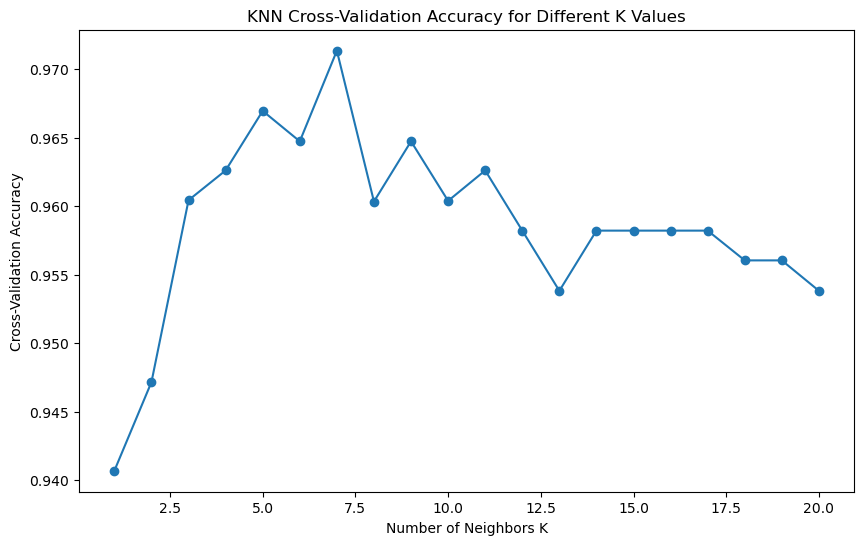

In [47]:
# Get the cross-validation results
cv_results = grid_search.cv_results_
# Plot the cross-validation accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], cv_results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.show()

#Decision Tree

In [55]:
#Import Required Libraries and apply decision tree
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Standardize the data
    ('dt', DecisionTreeClassifier()) # Decision Tree classifier
])
pipeline.fit(x_train, y_train)
# Predict on the training and testing set
y_pred_train_dt = pipeline.predict(x_train)
y_pred_test_dt = pipeline.predict(x_test)
# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_dt)
testing_accuracy = accuracy_score(y_test, y_pred_test_dt)
print("\nDecision Trees")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")
y_pred_prob_dt = pipeline.predict_proba(x_test)[:, 1]


Decision Trees
Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315


In [56]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_dt,
    'Predicted Probability': y_pred_prob_dt
})
results_df.head()

Actual Label  Predicted Label  Predicted Probability
204             0                0                    0.0
70              1                1                    1.0
131             1                1                    1.0
431             0                0                    0.0
540             0                0                    0.0

In [57]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.92307692 0.87912088 0.94505495 0.9010989  0.93406593]
Mean CV Score: 0.9164835164835164


Confusion Matrix:
[[68  3]
 [ 3 40]]


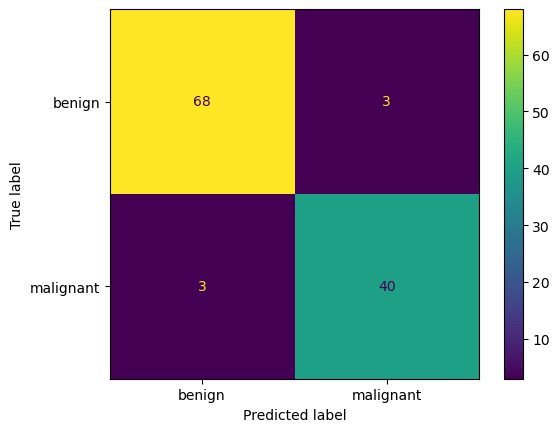

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_dt, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

Optimal Threshold: 1.0000


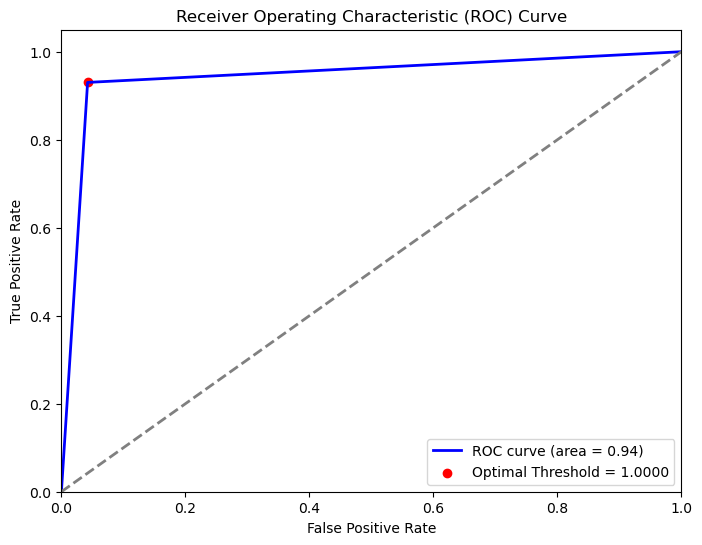

In [59]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(fpr, tpr)
# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold:.4f}")
# Plot ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [60]:
# Create a pipeline with a standard scaler and a pruned decision tree classifier
pipeline_pruned = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('dt', DecisionTreeClassifier(ccp_alpha=0.01, random_state=42))  # Pruned Decision Tree classifier
])
# Perform cross-validation
cv_scores_pruned = cross_val_score(pipeline_pruned, x_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores (Pruned): {cv_scores_pruned}")
print(f"Mean CV Score (Pruned): {cv_scores_pruned.mean()}")
# Train the pruned pipeline on the training data
pipeline_pruned.fit(x_train, y_train)
# Train the pruned pipeline on the training data
pipeline_pruned.fit(x_train, y_train)
# Predict on the training and testing set
y_pred_train_dt_pruned = pipeline_pruned.predict(x_train)
y_pred_test_dt_pruned = pipeline_pruned.predict(x_test)
# Calculate training and testing accuracy for the pruned model
training_accuracy_pruned = accuracy_score(y_train, y_pred_train_dt_pruned)
testing_accuracy_pruned = accuracy_score(y_test, y_pred_test_dt_pruned)
print("\nPruned Decision Trees")
print(f"Training Accuracy: {training_accuracy_pruned}")
print(f"Testing Accuracy: {testing_accuracy_pruned}")

Cross-Validation Scores (Pruned): [0.92307692 0.91208791 0.94505495 0.93406593 0.93406593]
Mean CV Score (Pruned): 0.9296703296703297

Pruned Decision Trees
Training Accuracy: 0.9802197802197802
Testing Accuracy: 0.956140350877193


In [61]:
# Predict probabilities for ROC-AUC calculation
y_pred_prob_dt_pruned = pipeline_pruned.predict_proba(x_test)[:, 1]

In [62]:
y_pred_prob_dt_pruned

array([0.01901141, 0.98550725, 0.98550725, 0.01901141, 0.01901141,
       0.98550725, 0.98550725, 1.        , 0.98550725, 0.01901141,
       0.01901141, 0.98550725, 0.01901141, 1.        , 0.01901141,
       0.98550725, 0.01901141, 0.01901141, 0.01901141, 0.98550725,
       0.01901141, 0.01901141, 0.98550725, 0.01901141, 0.01901141,
       0.        , 0.01901141, 0.01901141, 0.01901141, 0.98550725,
       0.01901141, 0.01901141, 0.01901141, 0.01901141, 0.01901141,
       0.01901141, 0.84615385, 0.01901141, 0.98550725, 0.01901141,
       0.01901141, 0.98550725, 0.01901141, 0.01901141, 0.        ,
       0.01901141, 0.01901141, 0.01901141, 0.01901141, 0.01901141,
       0.98550725, 0.98550725, 0.01901141, 0.        , 0.01901141,
       0.01901141, 0.01901141, 0.98550725, 0.98550725, 0.01901141,
       0.01901141, 0.98550725, 0.98550725, 0.01901141, 0.01901141,
       0.01901141, 0.98550725, 0.98550725, 0.01901141, 0.01901141,
       0.98550725, 0.98550725, 0.01901141, 0.98550725, 0.01901

In [64]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('dt', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])
# Define the parameter grid for GridSearchCV
param_grid = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__max_features': [None, 'sqrt', 'log2'],
    'dt__ccp_alpha': [0.0, 0.01, 0.1]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# Perform Grid Search
grid_search.fit(x_train, y_train)
# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Best Parameters: {'dt__ccp_alpha': 0.0, 'dt__max_depth': None, 'dt__max_features': 'log2', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Best Cross-Validation Score: 0.9406593406593406


In [65]:
# Predict on the testing set with the best estimator
y_pred = grid_search.best_estimator_.predict(x_test)
# Calculate and print the testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {testing_accuracy}")

Testing Accuracy: 0.956140350877193


#SVM

In [66]:
# Import necessary libraries
from sklearn.svm import SVC
# Create a pipeline with a standard scaler and an SVM classifier
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svm', SVC(probability=True, random_state=42))  # SVM classifier with probability estimates
])
# Train the pipeline on the training data
pipeline_svm.fit(x_train, y_train)
# Predict on the training and testing set
y_pred_train_svm = pipeline_svm.predict(x_train)
y_pred_test_svm = pipeline_svm.predict(x_test)
# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_svm)
testing_accuracy = accuracy_score(y_test, y_pred_test_svm)
print("\nSupport Vector Machines (SVM)")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")
# Predict probabilities for the test set
y_pred_prob_svm = pipeline_svm.predict_proba(x_test)[:, 1]


Support Vector Machines (SVM)
Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9824561403508771


Confusion Matrix:
[[71  0]
 [ 2 41]]


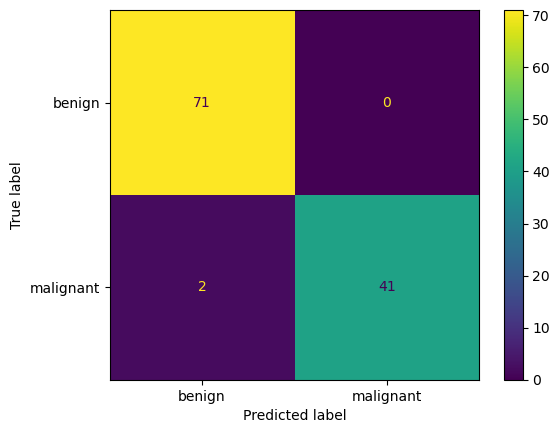

In [67]:
# Print confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_svm, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()